In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = np.array([[1,1],[3,2],[8,9],[9,8],[1,5]],dtype="float")

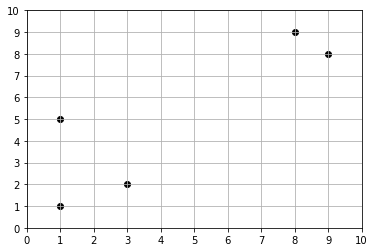

In [54]:
plt.axis([0,10,0,10])
plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(0,11,1))
plt.grid()
plt.scatter(data[:, 0], data[:, 1],color=(0,0,0))

In [20]:
print(data)
print(data.shape)

[[1. 1.]
 [3. 2.]
 [8. 9.]
 [9. 8.]
 [1. 5.]]
(5, 2)


In [22]:
diff = data.reshape(5,1,2)
print(diff)
print(diff.shape)

[[[1. 1.]]

 [[3. 2.]]

 [[8. 9.]]

 [[9. 8.]]

 [[1. 5.]]]
(5, 1, 2)


In [26]:
data2 = data.reshape(1,5,2)
print(data2)
data3 = np.repeat(data2, 5, axis=0)
print(data3)
print(data3.shape)

[[[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]]
[[[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]

 [[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]

 [[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]

 [[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]

 [[1. 1.]
  [3. 2.]
  [8. 9.]
  [9. 8.]
  [1. 5.]]]
(5, 5, 2)


In [27]:
diff2 = np.repeat(diff, 5, axis=1)
print(diff2)
print(diff2.shape)

[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[3. 2.]
  [3. 2.]
  [3. 2.]
  [3. 2.]
  [3. 2.]]

 [[8. 9.]
  [8. 9.]
  [8. 9.]
  [8. 9.]
  [8. 9.]]

 [[9. 8.]
  [9. 8.]
  [9. 8.]
  [9. 8.]
  [9. 8.]]

 [[1. 5.]
  [1. 5.]
  [1. 5.]
  [1. 5.]
  [1. 5.]]]
(5, 5, 2)


In [28]:
diff_manual = diff2 - data3
print(diff_manual)

[[[ 0.  0.]
  [-2. -1.]
  [-7. -8.]
  [-8. -7.]
  [ 0. -4.]]

 [[ 2.  1.]
  [ 0.  0.]
  [-5. -7.]
  [-6. -6.]
  [ 2. -3.]]

 [[ 7.  8.]
  [ 5.  7.]
  [ 0.  0.]
  [-1.  1.]
  [ 7.  4.]]

 [[ 8.  7.]
  [ 6.  6.]
  [ 1. -1.]
  [ 0.  0.]
  [ 8.  3.]]

 [[ 0.  4.]
  [-2.  3.]
  [-7. -4.]
  [-8. -3.]
  [ 0.  0.]]]


In [29]:
diff_bc = diff - data
print(diff_bc)

[[[ 0.  0.]
  [-2. -1.]
  [-7. -8.]
  [-8. -7.]
  [ 0. -4.]]

 [[ 2.  1.]
  [ 0.  0.]
  [-5. -7.]
  [-6. -6.]
  [ 2. -3.]]

 [[ 7.  8.]
  [ 5.  7.]
  [ 0.  0.]
  [-1.  1.]
  [ 7.  4.]]

 [[ 8.  7.]
  [ 6.  6.]
  [ 1. -1.]
  [ 0.  0.]
  [ 8.  3.]]

 [[ 0.  4.]
  [-2.  3.]
  [-7. -4.]
  [-8. -3.]
  [ 0.  0.]]]


In [30]:
diff_sbc = diff_bc**2
print(diff_sbc)

[[[ 0.  0.]
  [ 4.  1.]
  [49. 64.]
  [64. 49.]
  [ 0. 16.]]

 [[ 4.  1.]
  [ 0.  0.]
  [25. 49.]
  [36. 36.]
  [ 4.  9.]]

 [[49. 64.]
  [25. 49.]
  [ 0.  0.]
  [ 1.  1.]
  [49. 16.]]

 [[64. 49.]
  [36. 36.]
  [ 1.  1.]
  [ 0.  0.]
  [64.  9.]]

 [[ 0. 16.]
  [ 4.  9.]
  [49. 16.]
  [64.  9.]
  [ 0.  0.]]]


In [32]:
# summate the distance of x and y from a data to each data
diff_ssbc = diff_sbc.sum(axis=2)
print(diff_ssbc)
print(diff_ssbc.shape)

[[  0.   5. 113. 113.  16.]
 [  5.   0.  74.  72.  13.]
 [113.  74.   0.   2.  65.]
 [113.  72.   2.   0.  73.]
 [ 16.  13.  65.  73.   0.]]
(5, 5)


In [33]:
i = np.arange(5)
print(i)

[0 1 2 3 4]


In [35]:
diff_ssbc[i, i] = np.Inf
print(diff_ssbc)

[[ inf   5. 113. 113.  16.]
 [  5.  inf  74.  72.  13.]
 [113.  74.  inf   2.  65.]
 [113.  72.   2.  inf  73.]
 [ 16.  13.  65.  73.  inf]]


In [36]:
print(np.min(diff_ssbc, axis=1))

[ 5.  5.  2.  2. 13.]


In [37]:
index = np.argmin(diff_ssbc, axis=1)
print(index)

[1 0 3 2 1]
